---

# **Exploração e análise de dados de clientes de um banco com SQL**

## Os dados

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

idade = idade do cliente

sexo = sexo do cliente (F ou M)

dependentes = número de dependentes do cliente

escolaridade = nível de escolaridade do clientes

salario_anual = faixa salarial do cliente

tipo_cartao = tipo de cartão do cliente

qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

iteracoes_12m = quantidade de iterações/transações nos últimos 12 meses

meses_inativo_12m = quantidade de meses que o cliente ficou inativo

limite_credito = limite de crédito do cliente

valor_transacoes_12m = valor das transações dos últimos 12 meses

qtd_transacoes_12m = quantidade de transações dos últimos 12 meses

A tabela foi criada no AWS Athena junto com o AWS S3 com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset


# **Exploração de dados:**

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

**Quantos clientes compoem esse dataset?**

    QUERY: SELECT COUNT(\*) FROM credito8

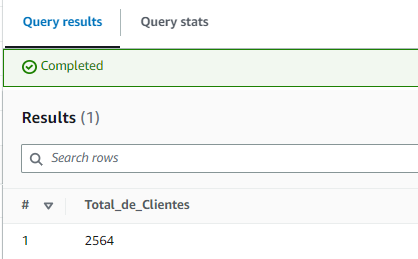

Apenas 2564 clientes serão estudados aqui. A obtenção desse subconjunto de dados não foi criteriosa, logo não representa fielmente o conjunto completo dos dados disponíveis no link acima.

Vamos conhecer melhor algumas proporções dentro deste dataset. 

### **Quantos homens e quantas mulheres fazem parte deste dataset?**

QUERY: SELECT COUNT(\*), sexo FROM credito8 GROUP BY sexo

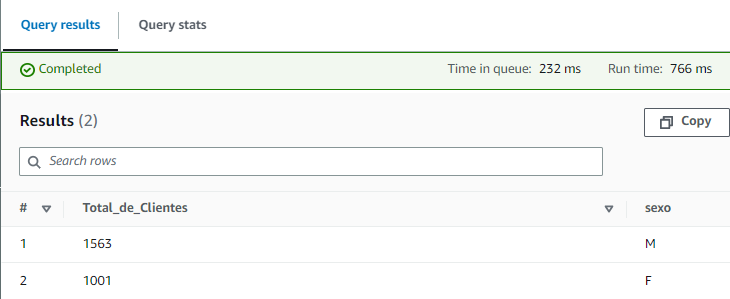

Podemos ver que os homens compõem cerca de 60% do dataset.

### **Agora vamos analisar a relação entre sexo e salário**
    
    QUERY: SELECT salario_anual, sexo, count(salario_anual) from credito8 
           group by salario_anual, sexo
           order by salario_anual

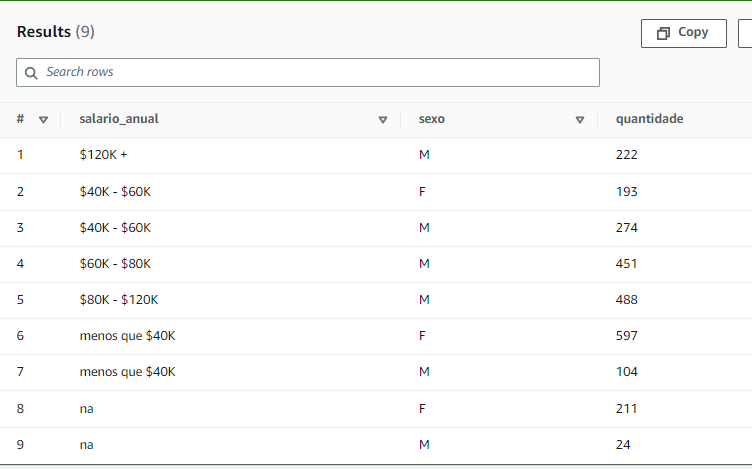

Podemos observar alguns pontos interessantes. Primeiramente, dados faltantes: alguns clientes (mais mulheres do que homens) não informaram - ou não foi possível obter - o salário. O número de mulheres que ganham até \\$40000 anuais é bem superior ao de homens nessa faixa salarial. Na faixa de que recebe entre \\$40000 e \\$60000 o número de mulheres cai significativamente, ficando abaixo do numero de homens (que quase triplicou quando comparado a faixa anterior). Além disso, não há registro de mulheres nas faixas salariais acima de \\$60000.

### **Como os clientes estão divididos por escolaridade?**

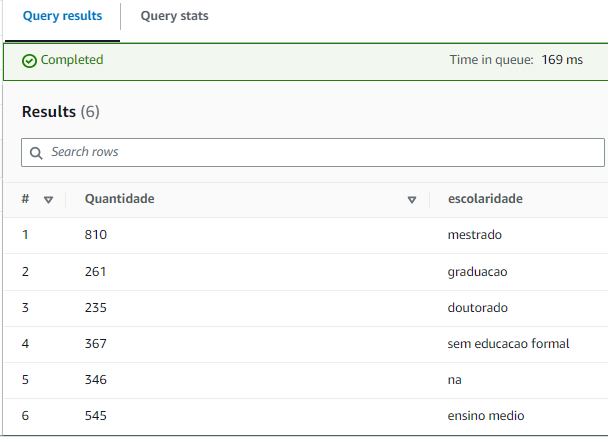

O nível de escolaridade mais comum é o mestrado e o que menos aparece é graduação, contrariando o senso comum de que quanto mais alto o nível de instrução, menos pessoas existem. Isso provavelmente é efeito da escolha do sub-conjunto de clientes. **Podemos analisar mais afundo essa tabela separando também por sexo.

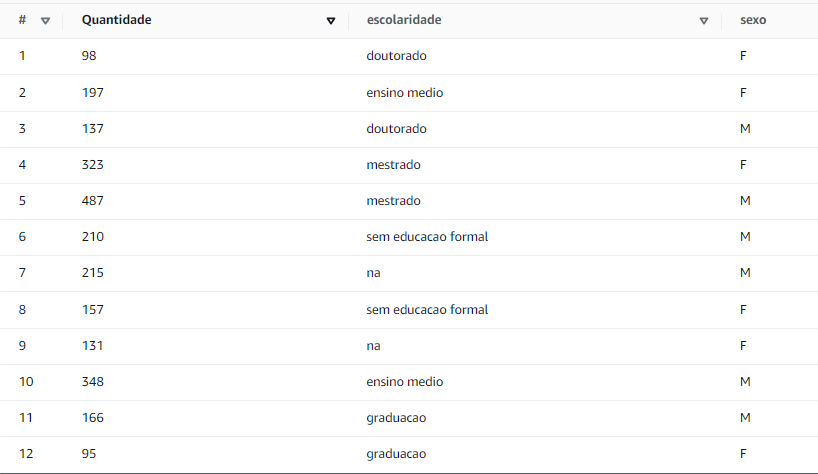

Vale a pena representar essa seleção de uma forma gráfica, para facilitar o entendimento. Para isso, baixei os dados dessa seleção e utilizei python para gerar um gráfico simples.

[Text(0, 0.5, 'contagem')]

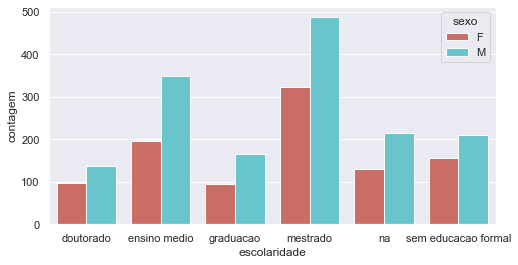

In [22]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('contEscSex.csv')
sns.set(rc={"figure.figsize":(8, 4)})

sns.barplot(data = data, x = 'escolaridade', y = '_col0', hue = 'sexo', palette = 'hls').set(ylabel = 'contagem')

Podemos ver que o número de homens supera o número de mulheres em todas as escolaridades. Isso é esperado dado que existem mais homens no dataset. Um número significativo de clientes não forneceu informação a respeito da escolaridade, e um número similar declarou não possuir educação formal.

Mantendo a análise em torno da escolaridade... 

### **Será que clientes com maior instrução têm maior limite e consomem mais?**
    
    QUERY: SELECT AVG(valor_transacoes_12m) AS media_valor, AVG(limite_credito) AS media_limite, escolaridade 
           FROM credito8 
           GROUP BY escolaridade
           ORDER BY escolaridade
           
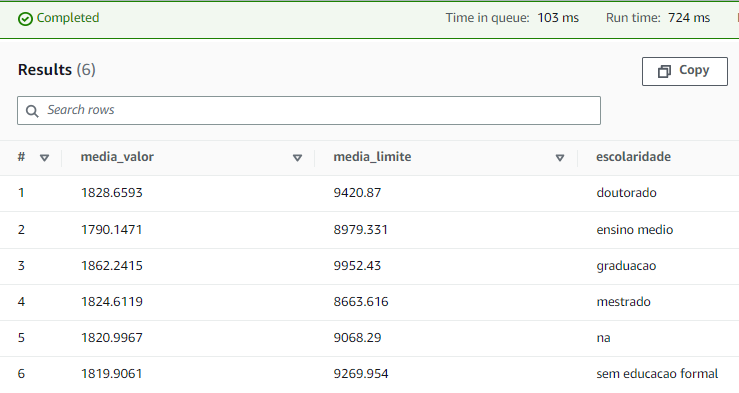

Podemos ver que a escolaridade tem pouca influência sobre as médias dos valores das transações e dos limites de crédito.

### Vamos analisar agora como os clientes utilizam o crédito disponínel.

**Primeiramente, como os clientes estão divididos por categoria de cartão**

    QUERY: SELECT COUNT(*) as Quantidade, sexo, tipo_cartao FROM credito8 GROUP BY tipo_cartao, sexo ORDER BY tip_cartao
    
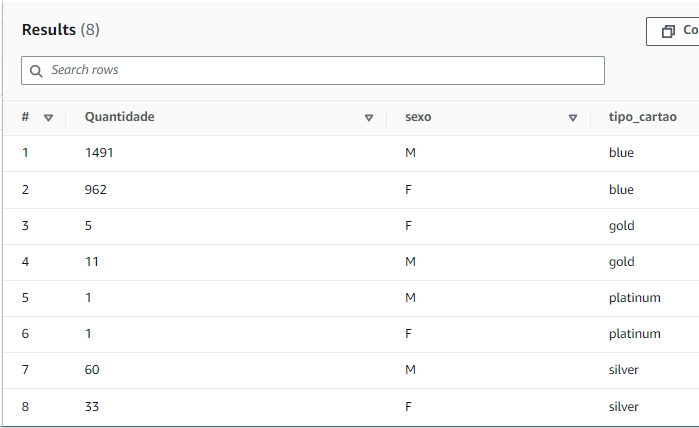

Vemos claramente que a maioria dos clientes neste dataset possuem cartões dos tipos Blue e Silver. Apenas dois clientes (um homem e uma mulher) possuem cartão do tipo Platinum. 

    QUERY: SELECT MAX(valor_gasto_12m) AS maior_valor_gasto, AVG(valor_gasto_12m) AS media_valor_gasto, MIN(valor_gasto_12m) AS 
           menor_valor_gasto, sexo, tipo_cartao FROM credito8
           GROUP BY sexo, tipo_cartao
           ORDER BY tipo_cartao;

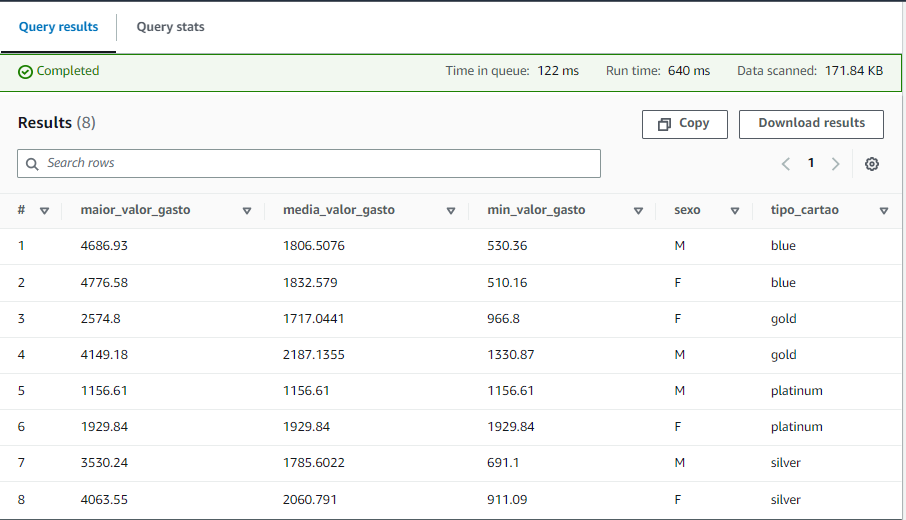

Podemos ver que os maiores e menores valores gastos não diferem muito entre os gêneros. O mais curioso que ambos os casos acontecem na mesma categoria de cartão, a Blue. Nessa categoria, a média de gastos é também bastante similar. Outra categoria onde os valores são similares é a Silver. 

Nas demais categorias, vemos que os gastos dos homens superam os das mulheres por uma boa margem.

### **E qual será o perfil dos clientes com maior limite, e daqueles com menor limite?** 

QUERY: SELECT idade, dependentes, sexo, salario_anual, limite_credito FROM credito8 ORDER BY limite_credito DESC LIMIT 10

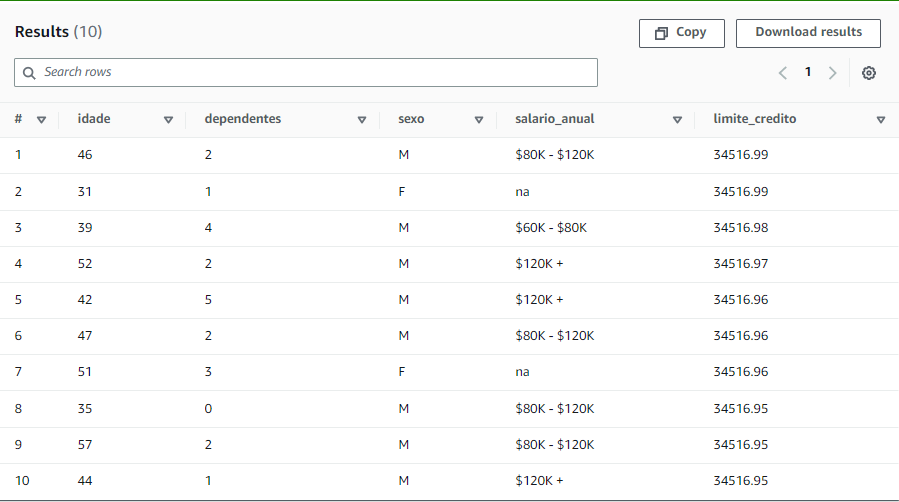

A maioria dos clientes com grandes limites é homem, entre 35 e 60 anos de idade e com até 2 dependentes. Um ponto bastante fora do padrão é o segundo maior limite: uma mulher com apenas 31 anos. Para a maioria dos clientes enquanto os salários estão concentrados nas categorias 80k-120k e 120k+.

QUERY: SELECT idade, dependentes, sexo, salario_anual, limite_credito FROM credito8 ORDER BY limite_credito ASC LIMIT 10

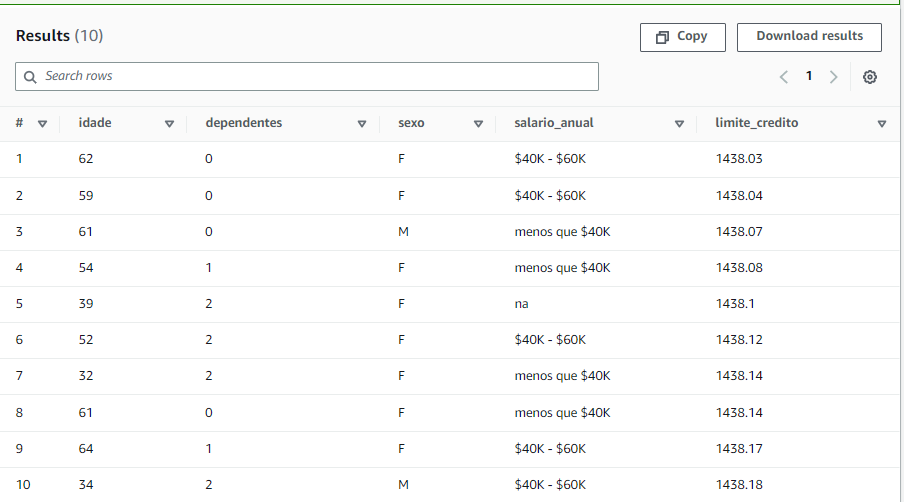

Já nos menores limites vemos muitas mulheres, familias pequenas - nenhum caso de 3 ou mais dependentes, faixa etária ligeiramente maior e salários de até 60K.

**Qual a idade média dos clientes com cada tipo de cartão**

    QUERY: SELECT AVG(idade) as Idade_media, tipo_cartao FROM credito8 GROUP BY tipo_cartao
    
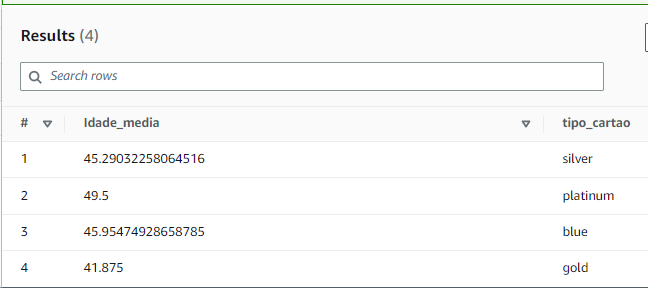

## Insights sobre os dados

A maioria dos clientes possuem cartão dos tipos blue e silver.

Apenas dois clientes possuem cartão do tipo platinum.

A idade média dos clientes em cada categoria fica entre 40 e 50 anos.

As escolaridades mais comuns são ensino médio e mestrado.

O número de clientes homens é significativamente maior que o de mulheres.

A média do valor das transações anuais não varia muito com o tipo de cartão.

Os clientes com maiores limites são, na maioria, homens. E as mulheres são a maioria entre os menores limites. 

Escolaridade não influencia significativamente os gastos e limites de crédito dos clientes